In [160]:
## imports
import os

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print("Current working directory:", os.getcwd())

## global variables
DATA_PATH = "../../data/raw/teco-psda-exercisesheet1-hdma-2024"

Current working directory: /Users/frbroy/Library/Mobile Documents/com~apple~CloudDocs/KIT/SoSe2024/PSDA/prac-smart-data-analytics/notebooks/exercise-01


In [161]:
# Load the train dataset
train_df = pd.read_csv(DATA_PATH + "/hdma_train.csv")

# Load the test dataset
test_df = pd.read_csv(DATA_PATH + "/hdma_test.csv")

In [162]:
## data exploration
print("Number of records and features:", train_df.shape)

# 2. Display First Few Records
print("First few records:")
print(train_df.head())

# 3. Data Types of Features
print("Data types of features:")
print(train_df.dtypes)

# 4. Statistical Summary
print("Statistical summary:")
print(train_df.describe())
## --> mean and std looks good for variables

# 5. Distribution of Target Variables
# Assuming if there is a column named "target"
if "target" in train_df.columns:
    print("Distribution of target variables:")
    print(train_df["target"].value_counts())

# 6. Missing Values
print("Number of missing values per feature:")
print(train_df.isnull().sum())
## --> no missing values: good

Number of records and features: (2281, 14)
First few records:
   Unnamed: 0    dir    hir       lvr  ccs  mcs pbcr dmi self single  uria  \
0           0  0.221  0.221  0.800000  5.0  2.0   no  no   no     no   3.9   
1           1  0.265  0.265  0.921875  2.0  2.0   no  no   no    yes   3.2   
2           2  0.372  0.248  0.920398  1.0  2.0   no  no   no     no   3.2   
3           3  0.320  0.250  0.860465  1.0  2.0   no  no   no     no   4.3   
4           4  0.360  0.350  0.600000  1.0  1.0   no  no   no     no   3.2   

   condo black   deny  
0      0    no  False  
1      0    no  False  
2      0    no  False  
3      0    no  False  
4      0    no  False  
Data types of features:
Unnamed: 0      int64
dir           float64
hir           float64
lvr           float64
ccs           float64
mcs           float64
pbcr           object
dmi            object
self           object
single         object
uria          float64
condo           int64
black          object
deny           

In [163]:
## data preprocessing

# Perform one-hot encoding using pandas
train_df['condo'] = train_df['condo'].astype(str)
test_df["condo"] = train_df["condo"].astype(str)
categorical_cols = ["pbcr", "dmi", "self", "single", "condo", "black"]

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_encoded = pd.concat([ train_df.drop(columns=categorical_cols) , pd.get_dummies(train_df[categorical_cols]).astype(int)], axis=1)
df_encoded_test = pd.concat([ test_df.drop(columns=categorical_cols) , pd.get_dummies(test_df[categorical_cols]).astype(int)], axis=1)

# drop unwanted "Unnamed: 0"
train_df_enc = df_encoded.drop(columns=["Unnamed: 0"])
test_df_enc = df_encoded_test.drop(columns=["Unnamed: 0"])

# check correctness
print(display(test_df_enc))
print(display(train_df_enc))

,dir,hir,lvr,ccs,mcs,uria,pbcr_no,pbcr_yes,dmi_no,dmi_yes,self_no,self_yes,single_no,single_yes,condo_0,condo_1,black_no,black_yes
0,0.2800,0.2700,0.537634,1.0,2.0,4.3,1,0,0,1,1,0,1,0,1,0,1,0
1,0.2790,0.2080,0.751880,1.0,2.0,5.3,1,0,1,0,1,0,1,0,1,0,1,0
2,0.2800,0.2800,0.738255,1.0,2.0,3.2,1,0,1,0,1,0,0,1,1,0,1,0
3,0.2650,0.2650,0.835165,2.0,2.0,4.3,0,1,0,1,1,0,1,0,1,0,1,0
4,0.3100,0.3100,0.882353,4.0,2.0,3.2,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.4840,0.4720,1.000000,5.0,2.0,3.2,0,1,1,0,0,1,1,0,1,0,1,0
96,0.3221,0.3221,0.902778,4.0,2.0,3.2,0,1,1,0,1,0,0,1,1,0,0,1
97,0.2920,0.2074,0.892857,5.0,2.0,2.0,1,0,1,0,1,0,1,0,1,0,1,0
98,0.3680,0.2810,1.239130,2.0,2.0,2.0,1,0,1,0,1,0,0,1,1,0,0,1


None


,dir,hir,lvr,ccs,mcs,uria,deny,pbcr_no,pbcr_yes,dmi_no,dmi_yes,self_no,self_yes,single_no,single_yes,condo_0,condo_1,black_no,black_yes
0,0.221000,0.221000,0.800000,5.000000,2.000000,3.900000,False,1,0,1,0,1,0,1,0,1,0,1,0
1,0.265000,0.265000,0.921875,2.000000,2.000000,3.200000,False,1,0,1,0,1,0,0,1,1,0,1,0
2,0.372000,0.248000,0.920398,1.000000,2.000000,3.200000,False,1,0,1,0,1,0,1,0,1,0,1,0
3,0.320000,0.250000,0.860465,1.000000,2.000000,4.300000,False,1,0,1,0,1,0,1,0,1,0,1,0
4,0.360000,0.350000,0.600000,1.000000,1.000000,3.200000,False,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,0.300000,0.300000,0.777049,1.000000,2.000000,3.200000,False,1,0,1,0,1,0,0,1,0,1,1,0
2277,0.260000,0.200000,0.526761,2.000000,1.000000,3.100000,False,1,0,1,0,1,0,1,0,1,0,1,0
2278,0.320000,0.260000,0.753846,6.000000,1.000000,3.100000,True,0,1,1,0,1,0,0,1,0,1,0,1
2279,0.350000,0.260000,0.813559,2.000000,2.000000,4.300000,True,1,0,1,0,1,0,0,1,0,1,1,0


None


In [164]:
# Feature Scaling
scaler = StandardScaler()
columns_to_scale = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']

train_df_enc[columns_to_scale] = scaler.fit_transform(train_df_enc[columns_to_scale])
test_df_enc[columns_to_scale] = scaler.fit_transform(test_df_enc[columns_to_scale])

# Print the scaled DataFrame
print(display(train_df_enc))
print(display(test_df_enc))

,dir,hir,lvr,ccs,mcs,uria,deny,pbcr_no,pbcr_yes,dmi_no,dmi_yes,self_no,self_yes,single_no,single_yes,condo_0,condo_1,black_no,black_yes
0,-1.265515,-0.440094,0.363464,1.752150,0.524756,0.060968,False,1,0,1,0,1,0,1,0,1,0,1,0
1,-0.745932,0.158762,1.054118,-0.060149,0.524756,-0.285308,False,1,0,1,0,1,0,0,1,1,0,1,0
2,0.517600,-0.072614,1.045748,-0.664249,0.524756,-0.285308,False,1,0,1,0,1,0,1,0,1,0,1,0
3,-0.096453,-0.045393,0.706114,-0.664249,0.524756,0.258839,False,1,0,1,0,1,0,1,0,1,0,1,0
4,0.375895,1.315642,-0.769915,-0.664249,-1.327337,-0.285308,False,1,0,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,-0.332627,0.635124,0.233405,-0.664249,0.524756,-0.285308,False,1,0,1,0,1,0,0,1,0,1,1,0
2277,-0.804976,-0.725911,-1.184955,-0.060149,-1.327337,-0.334776,False,1,0,1,0,1,0,1,0,1,0,1,0
2278,-0.096453,0.090710,0.101915,2.356250,-1.327337,-0.334776,True,0,1,1,0,1,0,0,1,0,1,0,1
2279,0.257808,0.090710,0.440304,-0.060149,0.524756,0.258839,True,1,0,1,0,1,0,0,1,0,1,1,0


None


,dir,hir,lvr,ccs,mcs,uria,pbcr_no,pbcr_yes,dmi_no,dmi_yes,self_no,self_yes,single_no,single_yes,condo_0,condo_1,black_no,black_yes
0,-0.340934,-0.100266,-1.112224,-0.809924,0.395056,0.270902,1,0,0,1,1,0,1,0,1,0,1,0
1,-0.344001,-0.299418,-0.133352,-0.809924,0.395056,0.740402,1,0,1,0,1,0,1,0,1,0,1,0
2,-0.340934,-0.068145,-0.195602,-0.809924,0.395056,-0.245549,1,0,1,0,1,0,0,1,1,0,1,0
3,-0.386940,-0.116327,0.247173,-0.269975,0.395056,0.270902,0,1,0,1,1,0,1,0,1,0,1,0
4,-0.248923,0.028218,0.462772,0.809924,0.395056,-0.245549,1,0,1,0,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.284746,0.548581,1.000293,1.349873,0.395056,-0.245549,0,1,1,0,0,1,1,0,1,0,1,0
96,-0.211811,0.067085,0.556091,0.809924,0.395056,-0.245549,0,1,1,0,1,0,0,1,1,0,0,1
97,-0.304130,-0.301345,0.510765,1.349873,0.395056,-0.808950,1,0,1,0,1,0,1,0,1,0,1,0
98,-0.071033,-0.064933,2.092864,-0.269975,0.395056,-0.808950,1,0,1,0,1,0,0,1,1,0,0,1


None


/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

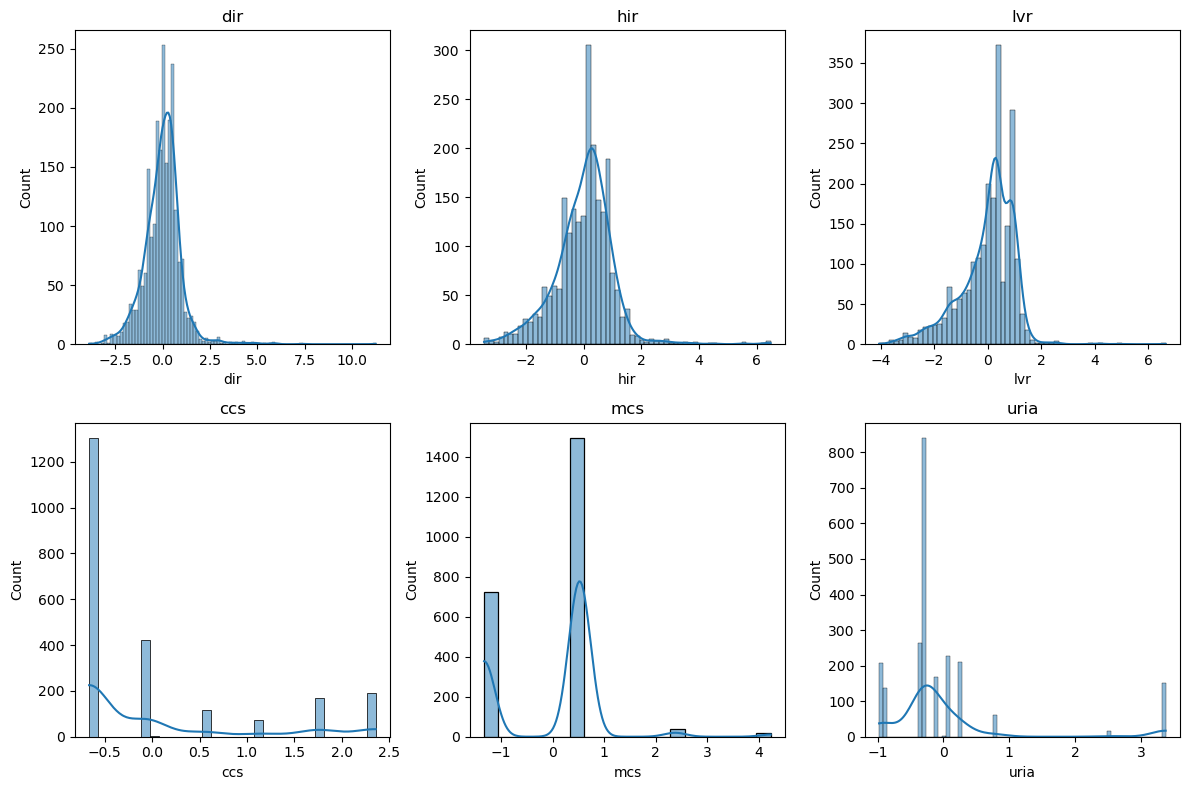

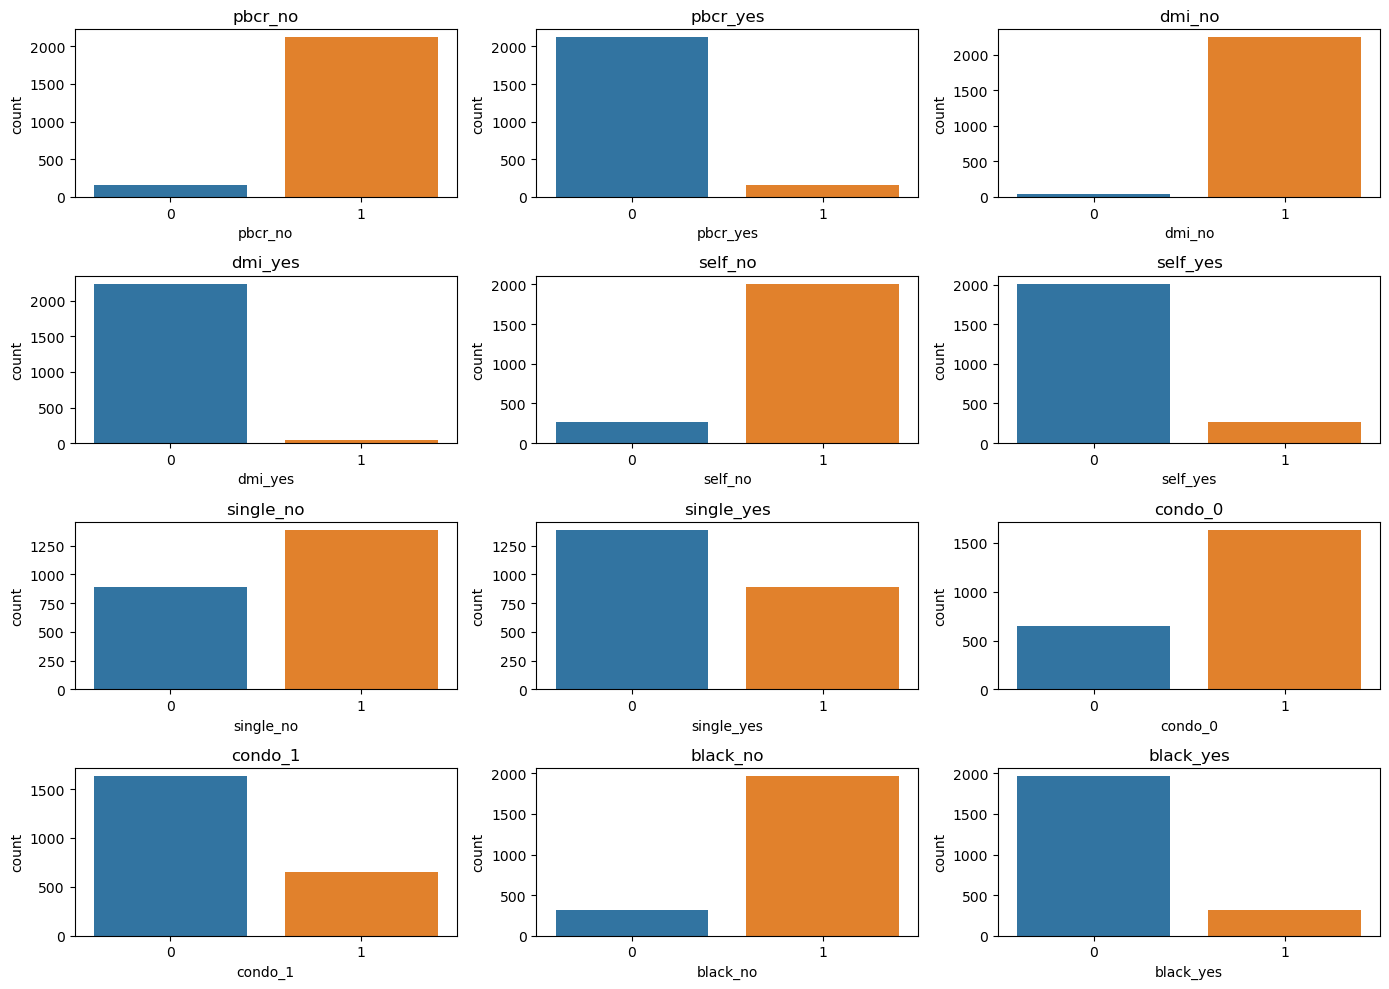

In [165]:
# Data Visualization
# Plot histograms for continuous variables
continuous_cols = ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria']
plt.figure(figsize=(12, 8))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df_enc[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# Plot count plots for categorical variables
categorical_cols = ['pbcr_no', 'pbcr_yes', 'dmi_no', 'dmi_yes', 'self_no', 'self_yes',
                    'single_no', 'single_yes', 'condo_0', 'condo_1', 'black_no', 'black_yes']
plt.figure(figsize=(14, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=train_df_enc, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()


/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: Fu

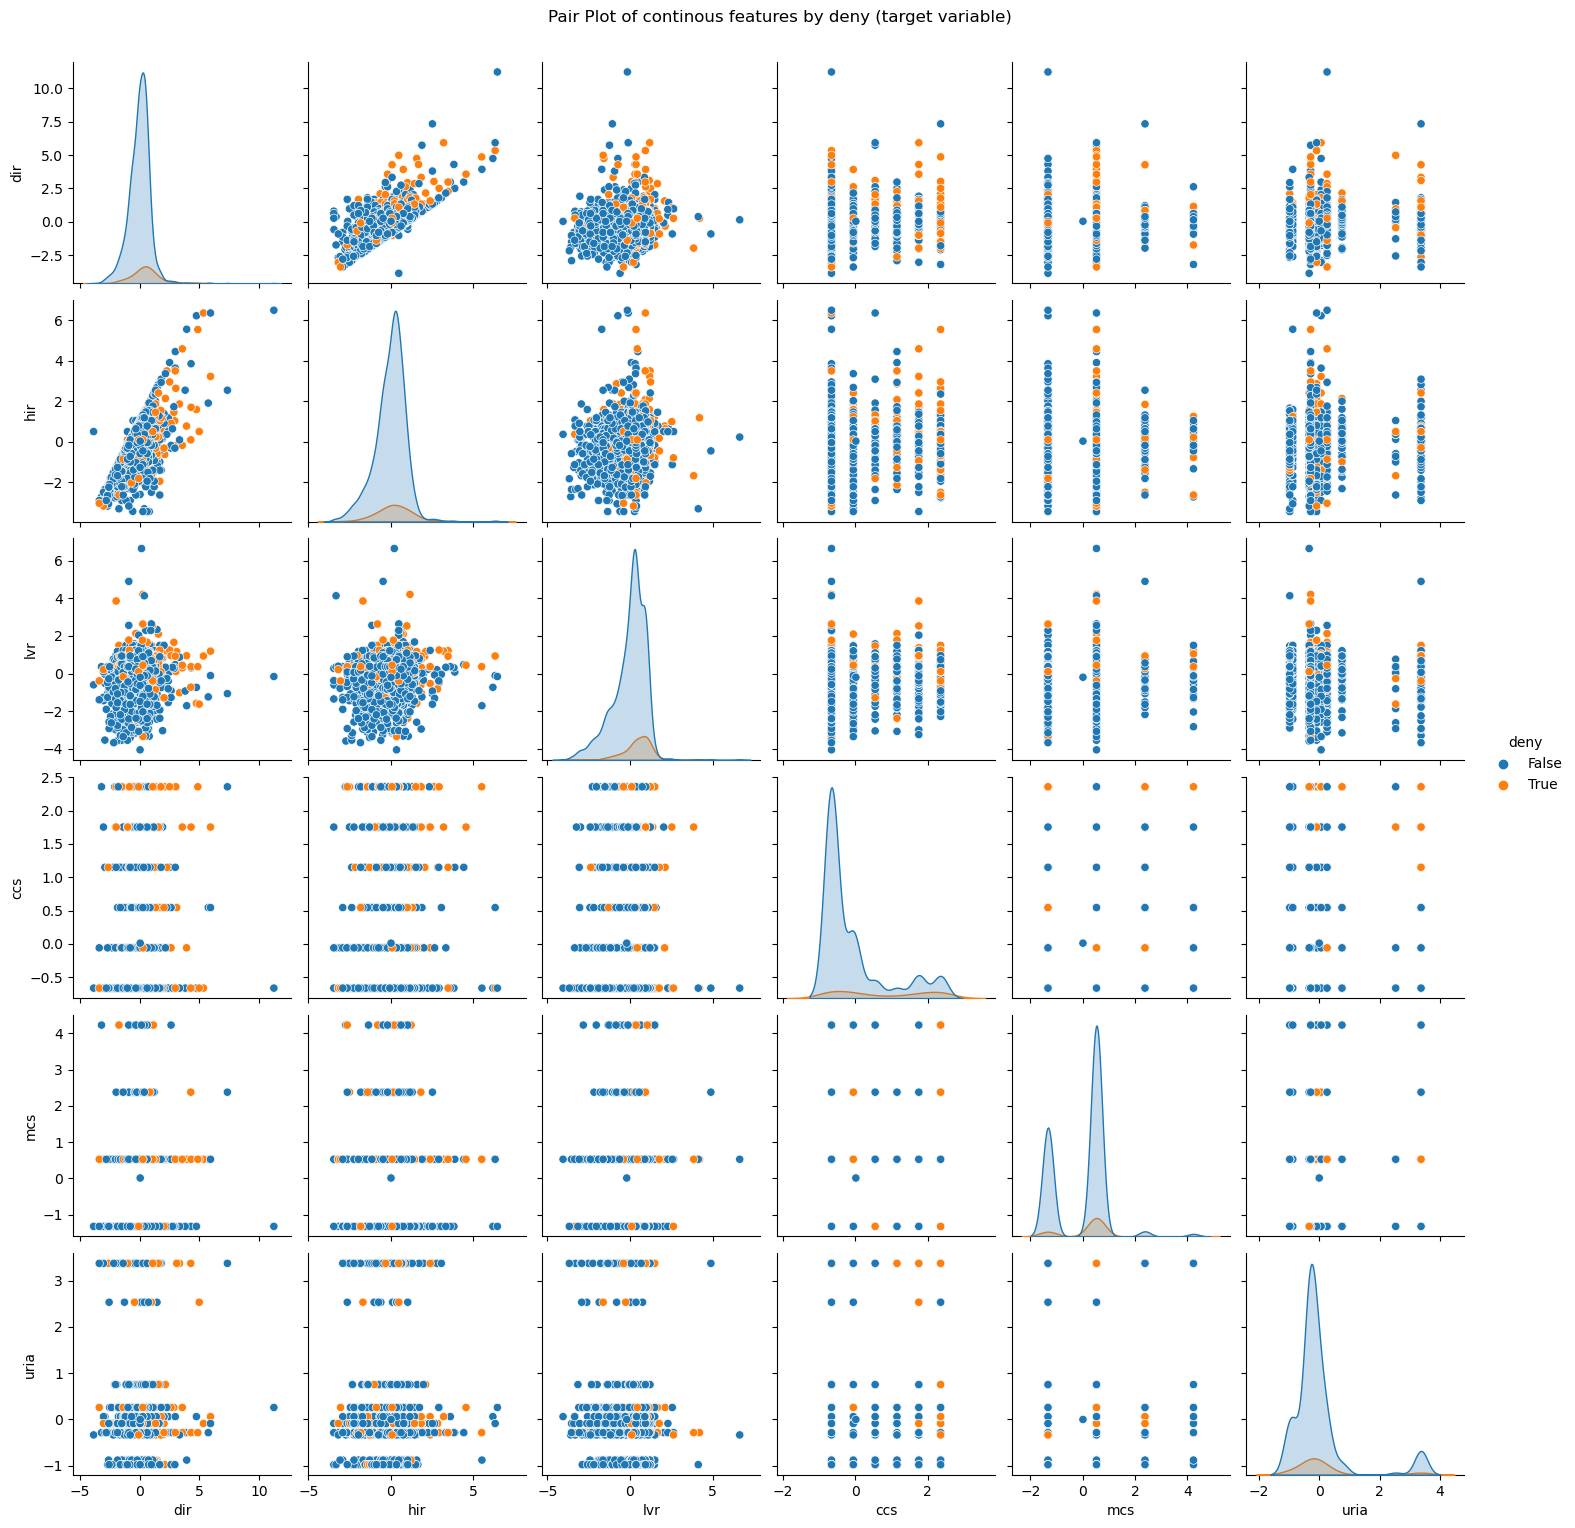

In [122]:
sns.pairplot(train_df_enc.loc[:, ['dir', 'hir', 'lvr', 'ccs', 'mcs', 'uria', "deny"]], hue='deny')
plt.suptitle('Pair Plot of continous features by deny (target variable)', y=1.02)
plt.show()

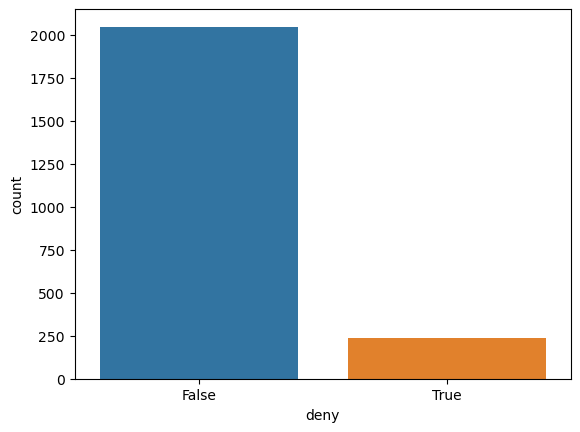

In [124]:
sns.countplot(data=train_df_enc, x="deny")
plt.show()

In [166]:
# Feature Selection


## Based on correlarion
correlation_matrix = train_df_enc.corr()

# Select features with a certain correlation threshold
correlation_threshold = 0.1
selected_features = correlation_matrix[abs(correlation_matrix['deny']) > correlation_threshold].index

filtered_data = train_df_enc[selected_features]
print(f"Now we have {len(filtered_data.columns)-1}/{len(train_df_enc.columns)-1} features: {filtered_data.columns}")

train_df = filtered_data

Now we have 9/18 features: Index(['dir', 'lvr', 'ccs', 'deny', 'pbcr_no', 'pbcr_yes', 'dmi_no', 'dmi_yes',
       'black_no', 'black_yes'],
      dtype='object')


In [167]:
## Rekursiv Feature Selection:

X = train_df.drop(columns=['deny'])
y = train_df["deny"]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

acc = 0
model = LogisticRegression()


for num_features_to_select in range(3, len(X_train.columns)):
    rfe = RFE(model, n_features_to_select=num_features_to_select)

    X_train_new = rfe.fit_transform(X_train, y_train)
    X_test_new = X_test.iloc[:, rfe.support_] 

    # Train and evaluate a model using the selected features
    model.fit(X_train_new, y_train)
    y_pred = model.predict(X_test_new)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Number of Features: {num_features_to_select}, Accuracy: {accuracy:.4f}")

    if accuracy > acc:
      acc = accuracy
      x_store = rfe.support_

/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


Number of Features: 3, Accuracy: 0.9081
Number of Features: 4, Accuracy: 0.9081
Number of Features: 5, Accuracy: 0.9212
Number of Features: 6, Accuracy: 0.9212
Number of Features: 7, Accuracy: 0.9168
Number of Features: 8, Accuracy: 0.9168


/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/Users/frbroy/miniconda3/envs/psda/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [169]:
# Select only good features after feature selection:
X_RFE = X.iloc[:, x_store]
display(X_RFE.head())

,ccs,pbcr_yes,dmi_no,dmi_yes,black_yes
0,1.752150,0,1,0,0
1,-0.060149,0,1,0,0
2,-0.664249,0,1,0,0
3,-0.664249,0,1,0,0
4,-0.664249,0,1,0,0


In [173]:
# Classifier